/lustre/home/almusawiaf/.local/lib/python3.10/site-packages/torch_geometric/typing.py:72: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /lustre/home/almusawiaf/anaconda3/envs/envGNN2/lib/python3.10/site-packages/torch_scatter/_version_cpu.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "


	- Loading the data...
/home/almusawiaf/MyDocuments/PhD_Projects/PSG_SURVIVAL_ANALYSIS/HGNN/src/data_generation/Data/100_Diagnoses/use_cases/Lung_Prostate_Liver_100/HGNN_data
	- Generating the Data structure ...
	- Generating the train, test, and validation sets...
	- Number of meta-paths used is :17
	- Preparing the model...
	- Epochs...
Test Precision: 
{'recall': 0.20996818663838812, 'accuracy': 0.9345880629805932, 'f1_score': 0.3278145695364238, 'auc': 0.8728436921371002, 'micro_precision': 0.7471698113207547, 'macro_precision': 0.8645508460579653}
	- Extracting and saving embeddings...


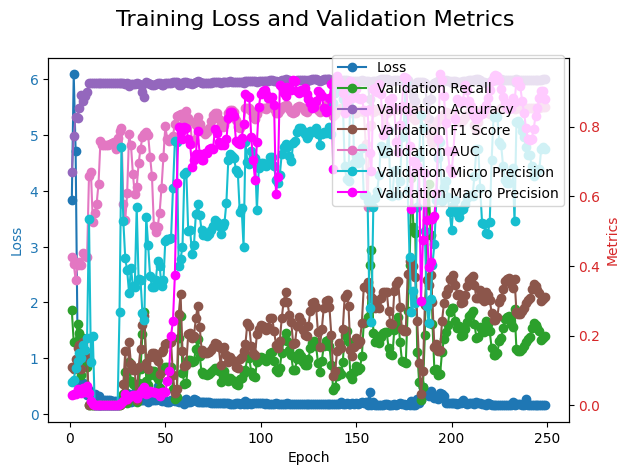

In [1]:
import sys, os

sys.path.append('/home/almusawiaf/MyDocuments/PhD_Projects/PSG_SURVIVAL_ANALYSIS/HGNN/src/data_generation/HGNN2/src/weighted_sum_precision')

from GNN_functions_patients_only import *
from GNN_SAGE import *

if __name__ == "__main__":
    disease_name = '10K/5000'
    saving_path = f'/home/almusawiaf/MyDocuments/PhD_Projects/PSG_SURVIVAL_ANALYSIS/HGNN/src/data_generation/Data/100_Diagnoses/{disease_name}/HGNN_data'

    GNN_model = SAGE_MLC
    num_epochs = 250
    with_SNF = True
    super_class = ''
    # super_class = '_sc'


    exp_name = f'{num_epochs}_epochs_SNF{super_class}'

    losses, val_metrics = main(saving_path, 
                               GNN_Model=GNN_model, 
                               num_epochs = num_epochs,
                               with_SNF = with_SNF,
                               exp_name = exp_name,
                               super_class = super_class)

    plot_combined_metrics_and_loss(losses, val_metrics)
    
    if with_SNF:
        save_results(losses, val_metrics, f'{saving_path}/performance_SAGE_{num_epochs}_eps_SNF')
    else:
        save_results(losses, val_metrics, f'{saving_path}/performance_SAGE_{num_epochs}_eps')
